In [1]:
#Module Imports
import numpy as np
import numpy.random as npr
import math
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import xlwings as xw

In [2]:
'''DEFINITION OF VARIABLES
    V0 - Total Firm Value at T=0
    D - Debt Value at T = T
    T - Time in Years
    R - Risk Free Rate
    SIGMA - Volatility of Firm Value
    DT - Time Step = T/N
    DF - Discount Factor = e^-RT
    I - Number of Simulations
    alpha - adjustment factor for curvature of barrier
'''

V0 = 100
alpha = 1.25

D=70
T=4
R=0.05
SIGMA=0.20
I = 1000
N=252*T

In [3]:
'''OPTION VALUATION - MONTE CARLO SIMULATION W/ ANTITHETIC VARIANCE REDUCTION W/ MILSTEIN SCHEME '''
def option_valuation(V0, D, T, N, SIGMA, R, I, alpha):    
    DT = T/N   #Time Step   
#GENERATE RANDOM NUMBERS - ANTITHETIC VARIANCE REDUCTION
    PHI = npr.standard_normal((N,int(I/2))) 
    PHI = np.concatenate((PHI, -PHI), axis=1)     
#SET UP EMPTY ARRAYS AND SET INITIAL VALUES    
    V = np.zeros_like(PHI) #Array to Capture Asset Value Path
    V[0] = V0
    Barrier = np.zeros_like(PHI)
#CREATE FOR LOOP TO GENERATE SIMULATION PATHS - MILSTEIN METHOD
    for t in range (1,N):
        V[t]=V[t-1]*(1+R*DT+(SIGMA*PHI[t]*np.sqrt(DT))+(SIGMA**2)*(0.5*(((PHI[t]**2)-1)*DT)))
    for t in range (1,N+1):
        Barrier[-t] = D * math.exp(-alpha*(t/N))
    Barrier[-1] = D
        
    return Barrier, V

In [4]:
#Run full simulation
Barrier, V = option_valuation(V0, D, T, N, SIGMA, R, I, alpha)
#You can un-comment the xw.view to get the sim results in excel
#xw.view(V)
#xw.view(Barrier)

In [5]:
#Evaluation of down and out put
#If at any point in the simulation path the underlying value does reach the barrier, the value of the path is zero.
X = V - Barrier
#xw.view(X)
for t in range(0,I):
    min = np.min(X[:,t])
    if min <= 0:
        V[:,t]= 0 

#You can un-comment the xw.view to get the sim results (after adjusting for barrier) in excel
#xw.view(V)

Number of Simulations 1000
Value of Firm's Equity = 43.329


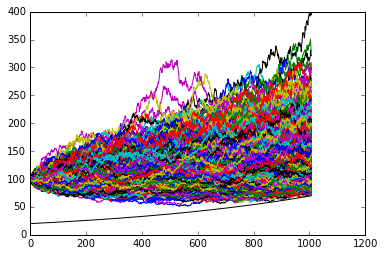

In [6]:
%matplotlib inline
#Calculation of Discounted Expected Payoff for Options

DF = math.exp(-R*T)  #Discount Factor

print("Number of Simulations %.d" %I)

Equity_Value = np.maximum(V[-1] - D, 0)
Equity_Value[Equity_Value == D] = 0
Equity_Value = DF * np.sum(Equity_Value) / I
    
print( "Value of Firm's Equity = %.3f" %Equity_Value)

#Create Graph of Monte Carlo Simulation
plt.plot(V)
plt.plot(Barrier[:,1])
plt.show()